In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os
from mpl_toolkits.mplot3d import Axes3D

Two years historical data of moreno cryptocurrency

In [79]:
data = yf.download('XMR-GBP', start='2020-10-31', end='2022-10-31')

[*********************100%***********************]  1 of 1 completed


The five first data 

In [80]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-31,94.957405,98.868004,93.686073,97.593712,97.593712,880156404
2020-11-01,97.593712,98.145325,95.423653,97.907738,97.907738,731324424
2020-11-02,97.907722,99.092117,90.268456,91.886192,91.886192,972104469
2020-11-03,91.886177,92.532806,89.976311,92.023285,92.023285,953432344
2020-11-04,92.023308,92.646233,87.915306,89.431519,89.431519,1215547249


The last five data

In [82]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-26,125.735260,127.252373,125.703957,126.159126,126.159126,469987897
2022-10-27,126.164772,129.141220,125.406105,126.037575,126.037575,76876766
2022-10-28,126.026497,127.625023,125.124901,126.408562,126.408562,67928480
2022-10-29,126.391907,128.582214,125.640991,128.243896,128.243896,58845661
2022-10-30,128.241455,129.413574,126.038910,127.234688,127.234688,53955390


There are 729 data in 2 years

In [87]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 730 entries, 2020-10-31 to 2022-10-30
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


array([<AxesSubplot:xlabel='Date'>], dtype=object)

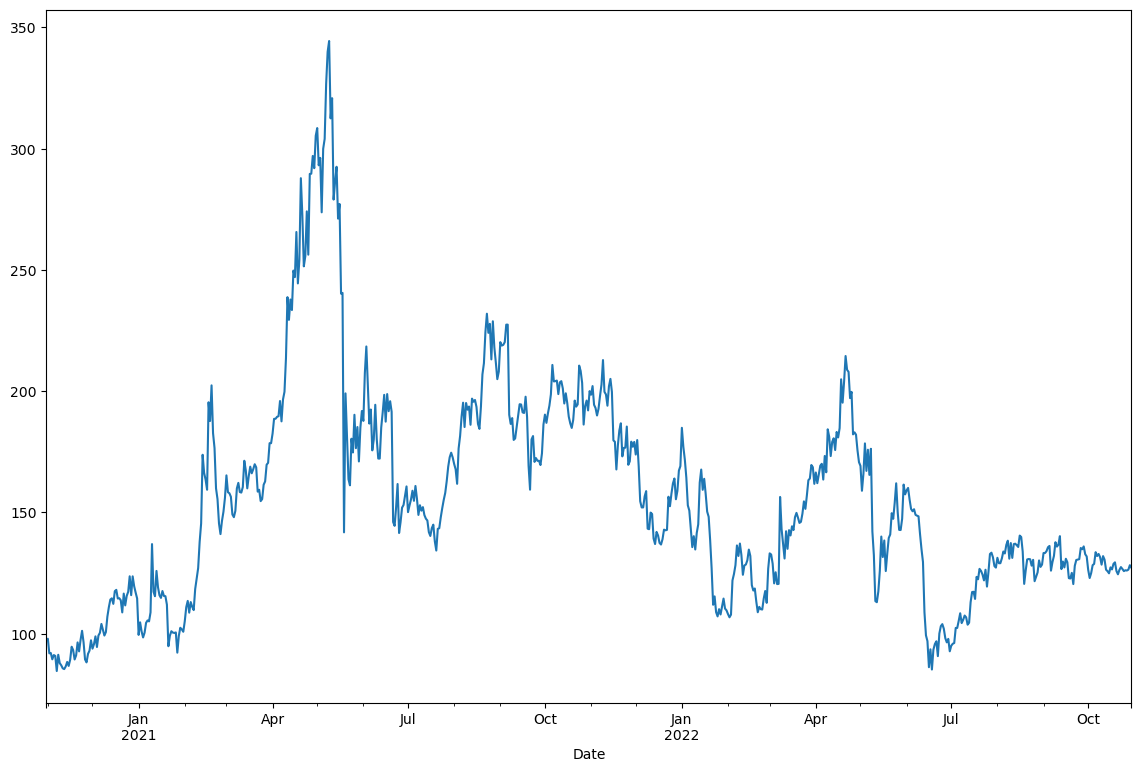

In [88]:
ADJ.plot(figsize=(14, 9), subplots=True)

In [89]:
ADJ.describe().round(2)

count    730.00
mean     154.90
std       44.74
min       84.60
25%      125.02
50%      148.53
75%      181.36
max      344.42
Name: Adj Close, dtype: float64

In [90]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,8))

The spot price is 127.23468781


Calculate the return by substracting tomorrow's price and today's price (the differences of the price)

In [91]:
data.diff().describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,729.00,729.00,729.00,729.00,729.00,7.290000e+02
mean,0.05,0.04,0.04,0.04,0.04,-1.133335e+06
std,9.51,8.11,9.01,9.44,9.44,1.180287e+08
min,-100.23,-46.95,-122.25,-98.74,-98.74,-1.113239e+09
25%,-3.78,-2.94,-2.73,-3.84,-3.84,-2.754764e+07
50%,0.35,0.15,0.50,0.29,0.29,-2.951635e+06
75%,4.37,3.26,3.65,4.41,4.41,2.572683e+07
max,57.58,56.73,34.02,57.31,57.31,7.643699e+08


Due to the lack confidence for the absolute return value that was calculated before, thus the precentage changes of the daily return is preferred

In [92]:
data.pct_change().round(4).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-26,-0.0074,-0.0030,-0.0053,0.0028,0.0028,6.4271
2022-10-27,0.0034,0.0148,-0.0024,-0.0010,-0.0010,-0.8364
2022-10-28,-0.0011,-0.0117,-0.0022,0.0029,0.0029,-0.1164
2022-10-29,0.0029,0.0075,0.0041,0.0145,0.0145,-0.1337
2022-10-30,0.0146,0.0065,0.0032,-0.0079,-0.0079,-0.0831


In [93]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [95]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-01,0.0274,-0.0073,0.0184,0.0032,0.0032,-0.1852
2020-11-02,0.0032,0.0096,-0.0555,-0.0635,-0.0635,0.2846
2020-11-03,-0.0635,-0.0685,-0.0032,0.0015,0.0015,-0.0194
2020-11-04,0.0015,0.0012,-0.0232,-0.0286,-0.0286,0.2429


The annualised volatility for three months maturity period of time

In [94]:
vol = np.sqrt(365)/ np.sqrt(4) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 52.99 %


The cumulative sum of the log return plot

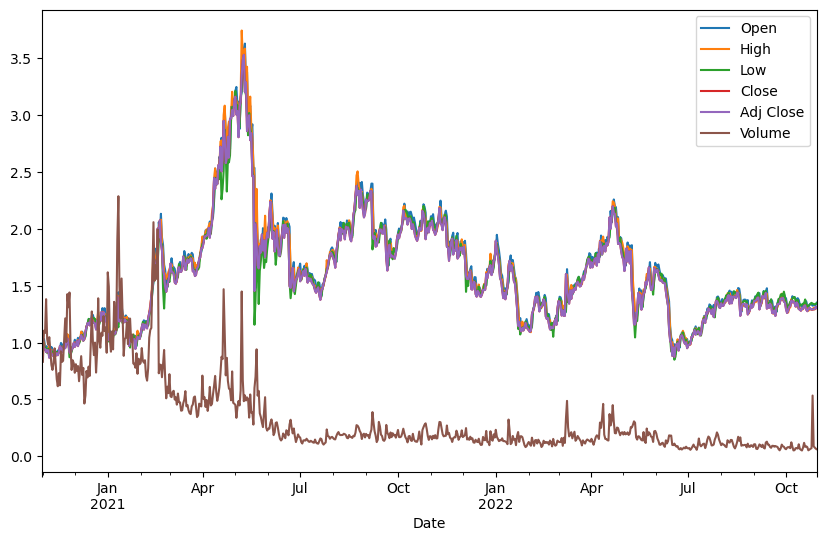

In [96]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [246]:
strike = np.linspace(70, 200, 24)
ttm = np.linspace(0.1, 2, 24)
strike, ttm = np.meshgrid(strike, ttm)
strike[:2].round(1)

array([[ 70. ,  75.7,  81.3,  87. ,  92.6,  98.3, 103.9, 109.6, 115.2,
        120.9, 126.5, 132.2, 137.8, 143.5, 149.1, 154.8, 160.4, 166.1,
        171.7, 177.4, 183. , 188.7, 194.3, 200. ],
       [ 70. ,  75.7,  81.3,  87. ,  92.6,  98.3, 103.9, 109.6, 115.2,
        120.9, 126.5, 132.2, 137.8, 143.5, 149.1, 154.8, 160.4, 166.1,
        171.7, 177.4, 183. , 188.7, 194.3, 200. ]])

# Binominal Option Pricing Model

In [32]:
import numpy as np
import os

Following is the calculation of Binominal tree for put option

In [347]:
S0 = 127.2               # spot stock price
K = 130.0                # strike
T = 0.25                 # maturity 
r = 0.024                # risk free rate 
sig = 0.52               # diffusion coefficient or volatility
N = 4                    # number of periods or number of time steps  
payoff = "put"           # payoff 

# First Step : Create the Binominal tree 

In [348]:
dT = T / N                                    # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

There are two loops denoted u and d ( up and down )

In [349]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [350]:
S

array([[127.2       , 144.85897036, 164.96950702, 187.87195698,
        213.95391704],
       [  0.        , 111.69373881, 127.2       , 144.85897036,
        164.96950702],
       [  0.        ,   0.        ,  98.07776171, 111.69373881,
        127.2       ],
       [  0.        ,   0.        ,   0.        ,  86.12163444,
         98.07776171],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         75.6230137 ]])

Risk neutral probability

In [116]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4733030232822535

# Second step : Derive the option value

In [117]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.8       ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 31.92223829],
       [ 0.        ,  0.        ,  0.        ,  0.        , 54.3769863 ]])

# Third step : Find value of the option for each nodes

European option

In [118]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[13.97485598,  5.7412022 ,  0.77442043,  0.        ,  0.        ],
       [ 0.        , 21.41365175, 10.22083888,  1.47254107,  0.        ],
       [ 0.        ,  0.        , 31.5328227 , 18.11140736,  2.8       ],
       [ 0.        ,  0.        ,  0.        , 43.68351174, 31.92223829],
       [ 0.        ,  0.        ,  0.        ,  0.        , 54.3769863 ]])

The European option value for put option is following

In [119]:
print('European ' + payoff, str( V[0,0].round(2)))

European put 13.97


# Black scholes pricing option

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf


CP= the same len as the underlying asset price

In [354]:
S = np.linspace(70,180,13)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(127.2, 127.2, 130, 0.024, 0.52, 'put')

In [138]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
# European option price with dividend
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [342]:
euro_option_bsm(127.2, 130, 3/12, 0.024, 0.00, 0.52, 'put')

14.296766883883492

The Black Scholes european put option value is 14.29

In [369]:
T = np.linspace(0.1,2,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(127.2, 130, T[i], 0.024, 0.00, 0.52, 'put')

The longer time to expiry , the more expensive the price is since the uncertainty is higher

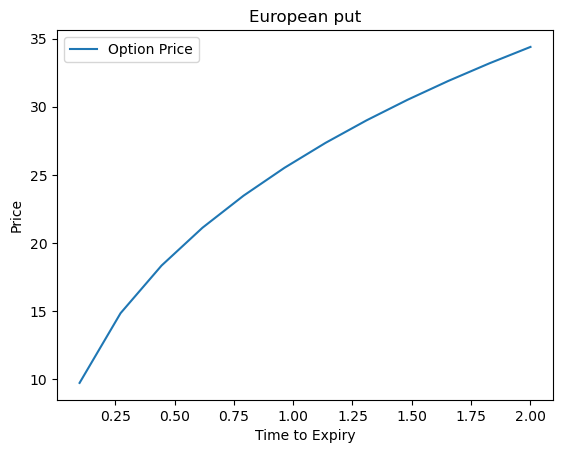

In [370]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European put')
plt.legend(['Option Price'])

The dividend is 0 as in cryptocurrency dividend is not applied

In [253]:
S = np.linspace(70,180,13)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 127.2, 3/12, 0.024, 0.00, 0.52, 'call')
    Put [i] = euro_option_bsm(S[i], 127.2, 3/12, 0.024, 0.00, 0.52, 'put')

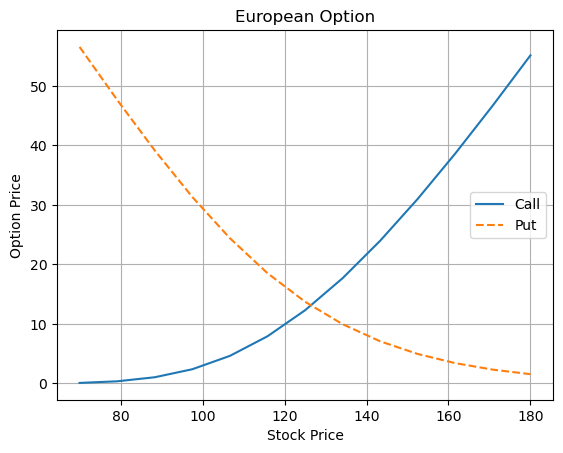

In [254]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

# Greek Risk Management

# Delta

In [154]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [156]:
delta(127.2, 130, 3/12, 0.024, 0.00, 0.52, 'put')

-0.47236286034441305

from the derived delta above it explains if the asset price increases by £1 thus the price of the put option will decrease by £0.47

In [180]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 127.2, 3/12, 0.024, 0.0, 0.52, 'call')
    Delta_Put [i] = delta(S[i], 127.2, 3/12, 0.024, 0.0, 0.52, 'put')

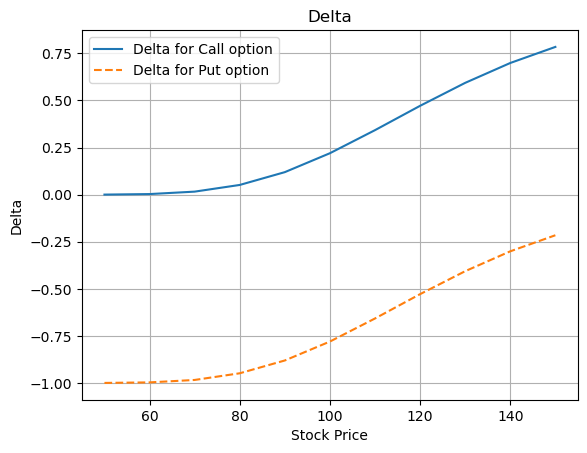

In [241]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call option','Delta for Put option'])

In [292]:
S = np.linspace(70, 180, 53)
T = np.linspace(0.1, 1, 53)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 130, T[i], 0.024, 0.0, 0.52, 'call')

/var/folders/r9/h7867wy15xxbkw1x80mbvql80000gn/T/ipykernel_9064/1480815743.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


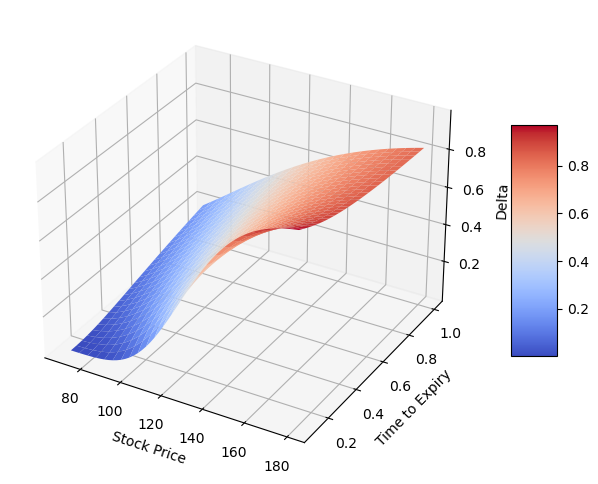

In [293]:

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

Gamma is the first order derivatives for delta

In [159]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [161]:
gamma(127.2, 130, 3/12, 0.024, 0.0, 0.52, 'put')

0.012033883689630194

if option price increase by £1, there will be an increase in the delta by 0.012.

In [263]:
S = np.linspace(70,180,18)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 127.2, 3/12, 0.024, 0.0, 0.52, 'call')

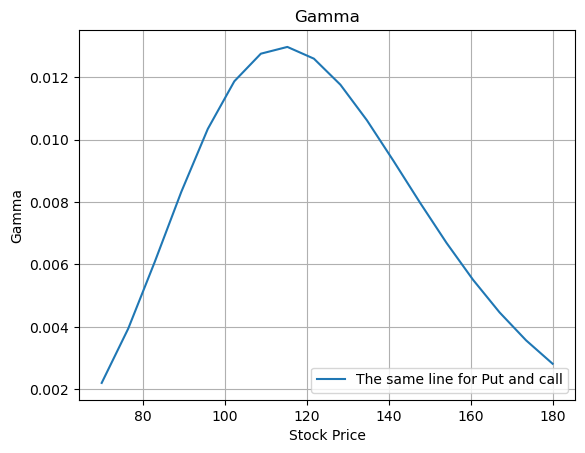

In [264]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['The same line for Put and call'])

In [320]:

S = np.linspace(70, 180, 53)
T = np.linspace(0.1, 1, 53)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 130, T[i], 0.024, 0.0, 0.52, 'call')


/var/folders/r9/h7867wy15xxbkw1x80mbvql80000gn/T/ipykernel_9064/3848859912.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


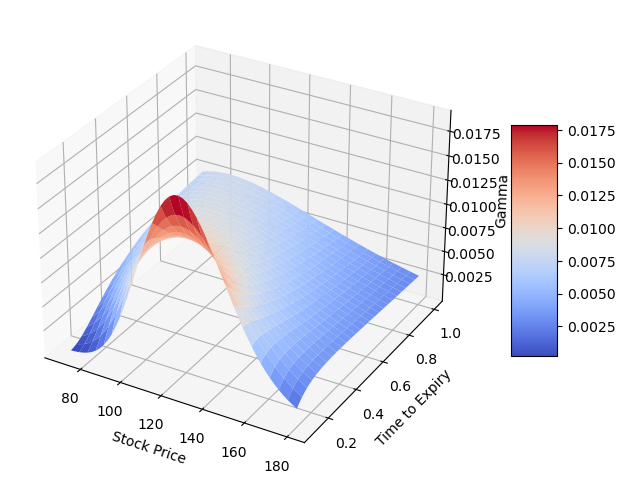

In [321]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed

Speed is the first order derivatives for Gamma

In [167]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [171]:
speed(127.2, 130, 3/12, 0.024, 0.0, 0.52, 'put')

-5.991680953709088e-05

this means if there is an increase in asset price by £1, the gamma will decrease by 5.99.

In [275]:
S = np.linspace(60,180,15)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 130, 3/12, 0.024, 0.0, 0.52, 'call')

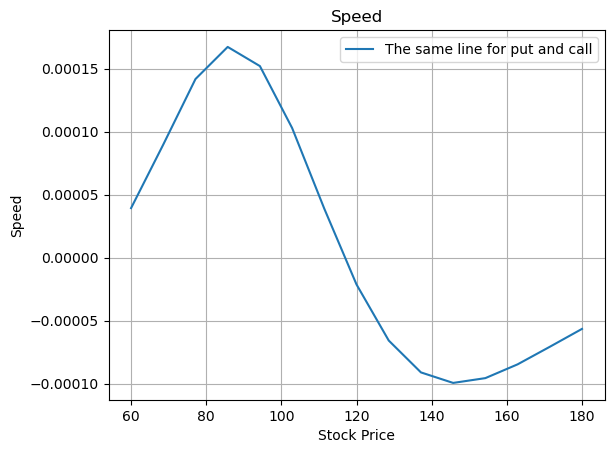

In [276]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['The same line for put and call'])

In [332]:
S = np.linspace(70, 180, 53)
T = np.linspace(0.1, 1, 53)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 130, T[i], 0.024, 0.0, 0.52, 'call')

/var/folders/r9/h7867wy15xxbkw1x80mbvql80000gn/T/ipykernel_9064/1603304871.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


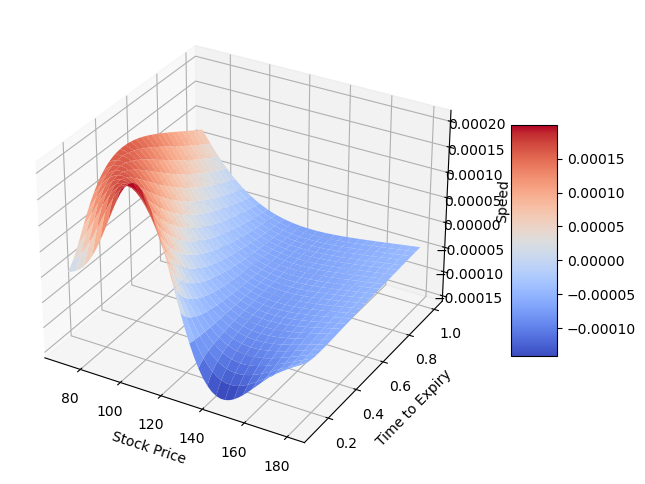

In [333]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

In [177]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [184]:
theta(127.2, 130, 3/12, 0.024, 0.0, 0.52, 'put')

24.539141728634277

The theta value is 24.53 which means if the time increase from 3 months to 4 months, the option price will increase by £2, assuming other conditions remain the same.  

In [277]:
T = np.linspace(0.1,2,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(127.2, 130, T[i], 0.024, 0.0, 0.52, 'call')
    Theta_Put [i] = theta(127.2, 130, T[i], 0.024, 0.0, 0.52, 'put')

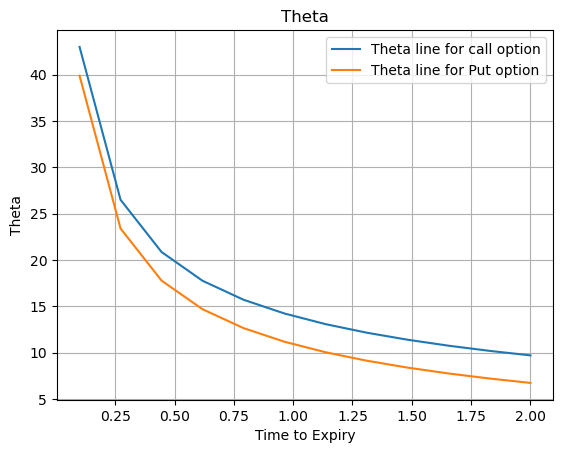

In [278]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta line for call option', 'Theta line for Put option'])

In [340]:
S = np.linspace(70, 180, 53)
T = np.linspace(0.1, 1, 53)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 130, T[i], 0.024, 0.0, 0.52, 'call')


/var/folders/r9/h7867wy15xxbkw1x80mbvql80000gn/T/ipykernel_9064/383283098.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


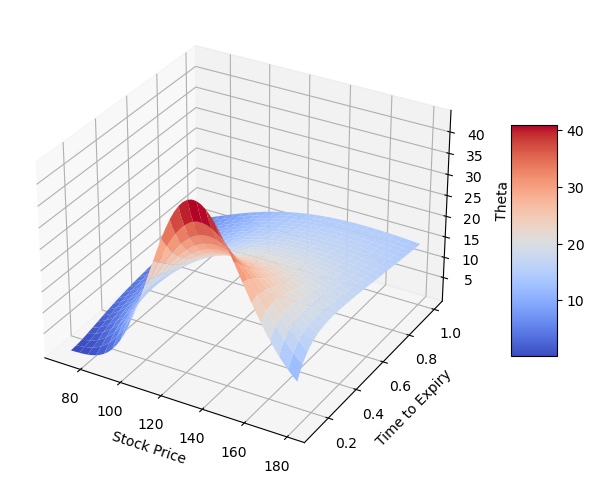

In [341]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

In [197]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [199]:

rho(127.2, 130, 3/12, 0.024, 0.0, 0.52, 'put')

-18.595330679923208

The Rho value derived via python is -18.59, it means if there is an increase in interest rate by 50BP or 0.5%, then the put option price will be decreased by £0.092. 

In [283]:
r = np.linspace(0,0.04,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(127.2, 130, 3/12, r[i], 0.0, 0.52, 'call')
    Rho_Put [i] = rho(127.2, 130, 3/12, r[i], 0.0, 0.52, 'put')

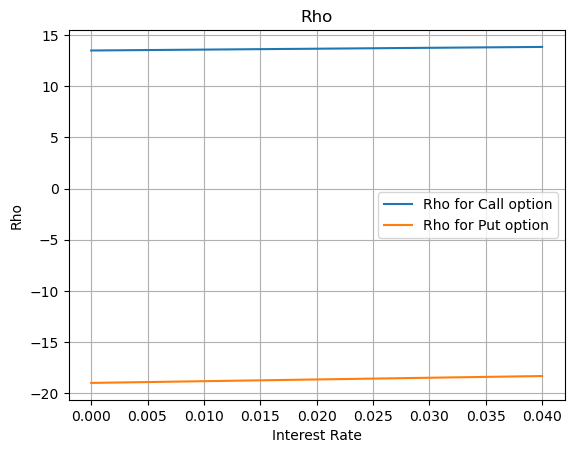

In [284]:

fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call option', 'Rho for Put option'])

In [334]:
S = np.linspace(70, 180, 53)
T = np.linspace(0.1, 1, 53)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 130, T[i], 0.024, 0.0, 0.52, 'call')

/var/folders/r9/h7867wy15xxbkw1x80mbvql80000gn/T/ipykernel_9064/3611634012.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


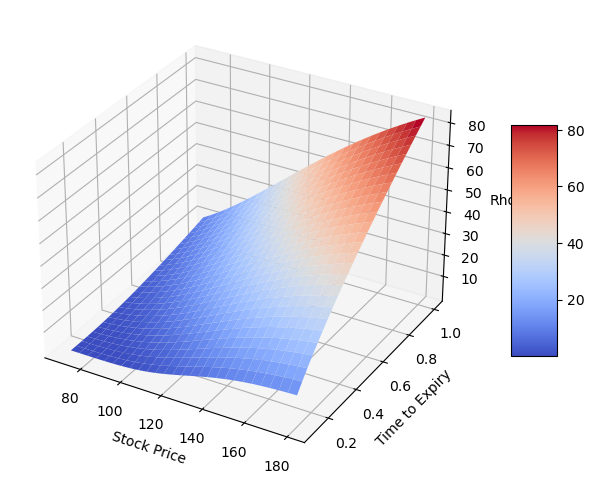

In [335]:

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega

In [204]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [206]:
vega(127.2, 130, 3/12, 0.024, 0.0, 0.52, 'put')

25.31182064798741

The value of Vega as calculated on python is 25.31, the proper interpretation from that would be if there is increase by 1% in volatility, the price of option will be increased by £0.25.

In [289]:
vol = np.linspace(0.1,0.8,15)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(127.2, 130, 0.25, 0.024, 0.0, vol[i], 'call')

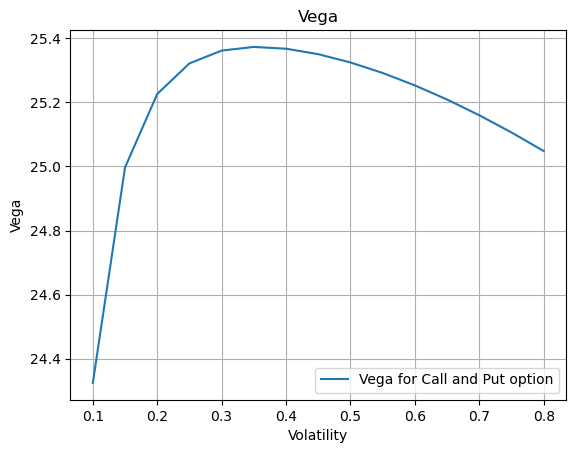

In [290]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put option'])

In [338]:

S = np.linspace(70, 180, 53)
T = np.linspace(0.1, 1, 53)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 130, T[i], 0.024, 0.0, 0.52, 'call')


/var/folders/r9/h7867wy15xxbkw1x80mbvql80000gn/T/ipykernel_9064/2704010610.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


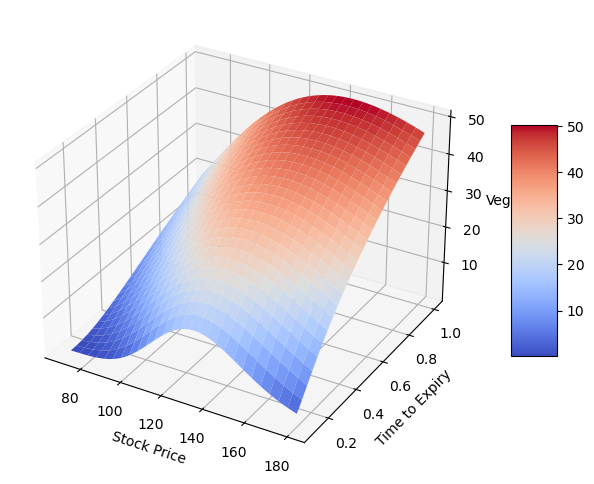

In [339]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);
